# VII Distributions
## Liquid-solid Distributions with sigma variable

In [2]:
import os

In [3]:
import numpy as np
import pandas as pd

In [4]:
from tqdm import tqdm

In [5]:
from ase import io
from ase.atoms import Atoms
from ase.visualize import view
from ase.build import sort, molecule

In [6]:
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.ndimage import gaussian_filter

In [7]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 18
# mpl.rcParams['font.family'] = 'Times'

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.top']=True

mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.right']=True

## Exercise 1: Choosing reference environments and appropriate $\sigma$ values <a name="ex1"></a>

## Preparing Ice VII

In [170]:
df = pd.read_pickle('/home/users/saadie5f/our_dft/DATASETS/data_relax.gzip', compression='gzip')
df

,energy,forces,ase_atoms,energy_corrected,energy_corrected_per_atom
ice7,-236.08285,"[[0.00232998, -0.00152794, 0.00303619], [0.000...","(Atom('H', [0.5170338272351557, 5.972355192734...",-231.694652,-4.826972
8,-944.922854,"[[6.24e-06, 0.00074742, 0.00011087], [-1.108e-...","(Atom('H', [-8.701062305200001e-06, 0.36020687...",-927.370063,-4.830052
VIII,-944.922854,"[[6.41e-06, 0.00074926, 0.00010935], [-1.094e-...","(Atom('H', [-8.8271455714e-06, 0.3602067232120...",-927.370063,-4.830052
ice8,-944.922854,"[[6.32e-06, 0.00074963, 0.00010919], [-1.109e-...","(Atom('H', [-8.8191570082e-06, 0.3602068855267...",-927.370063,-4.830052
9,-177.376658,"[[-0.00042732, 0.00052582, 0.00066274], [5.103...","(Atom('H', [5.55775650936389, 1.36554758032590...",-174.08551,-4.835709
...,...,...,...,...,...
engel31,-944.837959,"[[-0.00182886, 0.0007797, 0.00050987], [0.0022...","(Atom('H', [3.57117640984236, 8.30252944596885...",-927.285168,-4.82961
sVII,-177.082697,"[[0.00353119, 0.00050999, 0.00032742], [0.0031...","(Atom('H', [0.7736366979766524, 6.298655111701...",-173.791549,-4.827543
11i,-236.76352,"[[8.14e-06, 0.00220267, 0.00184673], [3.054e-0...","(Atom('H', [1.31117743649e-05, 3.5353644151761...",-232.375322,-4.841153
12,-354.109427,"[[0.00049145, -0.00130716, -0.00126622], [-0.0...","(Atom('H', [5.234866560163703, 0.6336570264142...",-347.527131,-4.826766


In [175]:
atoms = df[df.index == 'ice7'].ase_atoms.values[0]

In [176]:
view(atoms, viewer='nglview')

In [173]:
np.where(np.array(atoms.get_chemical_symbols())=='O')[0]+1

array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [ ]:
io.write('/home/users/saadie5f/piaggi/phase_diagram/atoms_ice_vii.dat',
         sort(atoms), format='lammps-data', specorder=['H','O'])

In [174]:
path = '/home/users/saadie5f/piaggi/phase_diagram/TIP4P-Ice-Phase-Diagram/GibbsDuhemSimulations\
/IceIh_Liquid/Initial/Liquid/water.data'
ph_1 = io.read(f'{path}',
                format='lammps-data')
ph_1.set_chemical_symbols(list(map(lambda s: 'O' if s == 'He' else s, ph_1.get_chemical_symbols())))
np.unique(ph_1.get_chemical_symbols())
ph_1.wrap()
view(ph_1, viewer='nglview')

In [ ]:
io.write('/home/users/saadie5f/piaggi/phase_diagram/water_64.dat',
         sort(ph_1), format='lammps-data', specorder=['H','O'])

In [177]:
interface = atoms.repeat([3,3,5])

In [178]:
view(interface, viewer='nglview')

In [202]:
traj = io.read('../vii/interface/traj.lammpstrj', index=':')
for atoms in tqdm(traj):
    atoms.wrap()
view(traj, viewer='nglview')

100%|██████████| 40/40 [00:00<00:00, 1740.34it/s]


In [201]:
traj = io.read('../vii/interface2/traj.lammpstrj', index=':')
for atoms in tqdm(traj):
    atoms.wrap()
view(traj, viewer='nglview')

100%|██████████| 42/42 [00:00<00:00, 1728.61it/s]


In [181]:
io.write('/home/users/saadie5f/piaggi/phase_diagram/full/vii/interface/water.dat',
         sort(interface), format='lammps-data', specorder=['H','O'])

In [179]:
len(interface)

2160

### Trajectory visualization

In [8]:
atoms_ice = io.read('../vii/dist/ice/traj.lammpstrj', index=':')

In [9]:
view(atoms_ice, viewer='nglview')

In [30]:
# atoms_liq = io.read('../vii/dist/ice/out.dcd', format='lammps-dump-binary', index=':')

In [19]:
for at in tqdm(atoms_liq):
    at.set_chemical_symbols(list(map(lambda s: 'O' if s == 'He' else s, at.get_chemical_symbols())))

100%|██████████| 400/400 [00:00<00:00, 4643.67it/s]


In [20]:
view(atoms_liq, viewer='nglview')

In [256]:
atoms_liq = io.read('../vii/dist/liquid/dump.na', index=':')
for atoms in tqdm(atoms_liq):
    atoms.set_chemical_symbols(list(map(lambda s: 'O' if s == 'He' else s, atoms.get_chemical_symbols())))

100%|██████████| 400/400 [00:00<00:00, 3661.32it/s]


In [257]:
view(atoms_liq, viewer='nglview')

In [258]:
atoms_ice = io.read('../vii/dist/ice/traj.lammpstrj', index=':')

In [262]:
x_lst_t = list(map(lambda at: at.cell[0,0], atoms_ice))
y_lst_t = list(map(lambda at: at.cell[1,1], atoms_ice))
z_lst_t = list(map(lambda at: at.cell[2,2], atoms_ice))
np.average(x_lst_t)/4,np.average(y_lst_t)/4,np.average(z_lst_t)/4

(3.4072718272556335, 3.4044320195468334, 3.4143868158418376)

In [140]:
3.4072718272556335/10

0.34072718272556335

In [260]:
x_lst_t = list(map(lambda at: at.cell[0,0], atoms_liq))
y_lst_t = list(map(lambda at: at.cell[1,1], atoms_liq))
z_lst_t = list(map(lambda at: at.cell[2,2], atoms_liq))
np.average(x_lst_t)/4,np.average(y_lst_t)/4,np.average(z_lst_t)/4

(4.16794405439485, 4.909287554805653, 5.084882011162535)

### Distributions of $k(\chi,\chi')$

In [55]:
histo_ice.shape

(2001, 3)

(-0.5, 2.0)

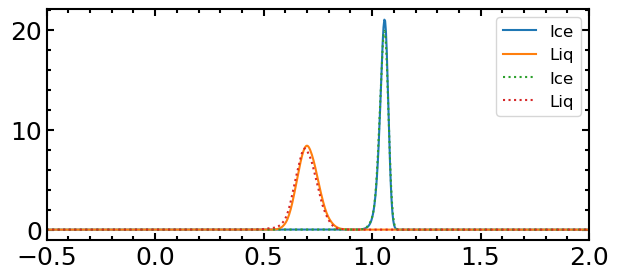

In [67]:
fig, axs= plt.subplots(figsize=(7,3), nrows=1,sharex=True) #,sharey=True)

i=0.07
s = f'histo-{i:.2f}'
data_ice_old=np.genfromtxt(f"../vii/dist/plumed_ice/{s}")
data_liq_old=np.genfromtxt(f"../vii/dist/plumed_liq/{s}")
axs.plot(data_ice_old[:,0],data_ice_old[:,1], label='Ice')
axs.plot(data_liq_old[:,0],data_liq_old[:,1], label='Liq')


# data_liq=np.loadtxt('../vii/dist_on_the_fly/liquid/COLVAR')
# data_ice=np.loadtxt('../vii/dist_on_the_fly/ice/COLVAR')
histo_ice=np.loadtxt("../vii/dist_on_the_fly/ice/histo")
histo_liq=np.loadtxt("../vii/dist_on_the_fly/liquid/histo")

# axs[0].plot(data_liq[:,0],data_liq[:,1], label='Liq')
# axs[0].plot(data_ice[:,0],data_ice[:,1], label='Ice')
axs.plot(histo_ice[:,0],histo_ice[:,1], label='Ice', ls=':')
axs.plot(histo_liq[:,0],histo_liq[:,1], label='Liq', ls=':')
# axs[0].text(-.0,np.amax(data_ice[:,1])/2,r"$\sigma$= 0.07", fontsize=12)

# x_liq = data_liq[:,0][np.argmax(data_liq[:,1])]
# x_ice = data_ice[:,0][np.argmax(data_ice[:,1])]

# axs[0].axvline(x_liq, ls='--', lw=1, color='gray')
# axs[0].axvline(x_ice, ls='--', lw=1, color='gray')
# axs[0].axvline((x_ice+x_liq)/2, ls='--', lw=1, color='gray')
    
axs.legend(fontsize=12, loc='upper right')
# axs[0].set_ylabel("Probability density")
# axs[1].set_xlabel(r"$k(\chi,\chi')$")
plt.xlim(-.5,2)

Text(0.5, 0, "$k(\\chi,\\chi')$")

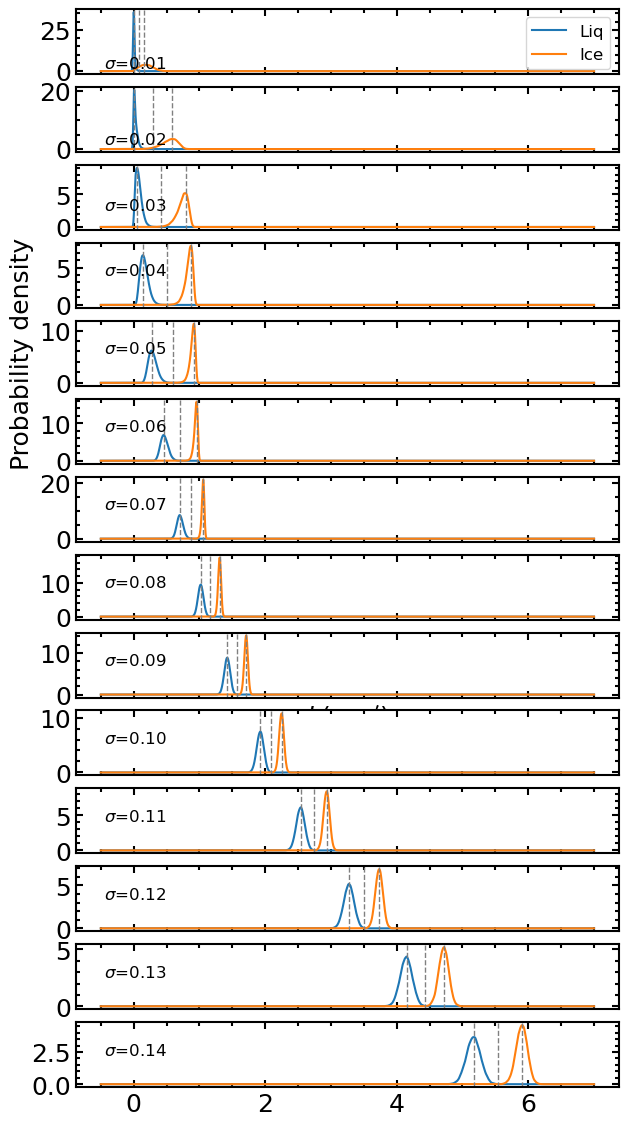

In [328]:
fig, axs= plt.subplots(figsize=(7,14), nrows=14,sharex=True) #,sharey=True)


for j,i in enumerate(np.arange(0.01,0.15,0.01)):
    s = f'histo-{i:.2f}'
    data_liq=np.genfromtxt(f"../vii/dist/plumed_liq/{s}")
    data_ice=np.genfromtxt(f"../vii/dist/plumed_ice/{s}")
    axs[j].plot(data_liq[:,0],data_liq[:,1], label='Liq')
    axs[j].plot(data_ice[:,0],data_ice[:,1], label='Ice')
    axs[j].text(-.45,np.amax(data_ice[:,1])/2,r"$\sigma$=" + f'{i:.2f}', fontsize=12)
    
    x_liq = data_liq[:,0][np.argmax(data_liq[:,1])]
    x_ice = data_ice[:,0][np.argmax(data_ice[:,1])]
    
    axs[j].axvline(x_liq, ls='--', lw=1, color='gray')
    axs[j].axvline(x_ice, ls='--', lw=1, color='gray')
    axs[j].axvline((x_ice+x_liq)/2, ls='--', lw=1, color='gray')
    
axs[0].legend(fontsize=12, loc='upper right')
axs[4].set_ylabel("Probability density")
axs[8].set_xlabel(r"$k(\chi,\chi')$")

Comments: Very significant overlap for extreme $\sigma$ values

Choice of $\sigma$

We use the following overlap metric between distributions $p(x)$ and $q(x)$

$\int min[p(x),q(x)] dx$

Text(0, 0.5, 'Overlap')

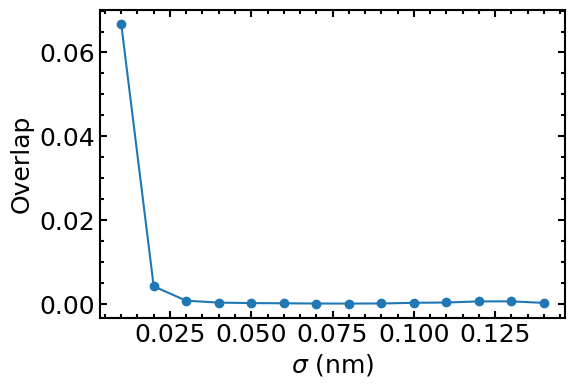

In [325]:
fig, axs= plt.subplots(figsize=(6,4), ncols=1, sharex=True, sharey=True)

sigma=np.arange(0.01,0.15,0.01)
overlap=np.zeros(sigma.shape[0])

for j,i in enumerate(np.arange(0.01,0.15,0.01)):
    s = f'histo-{i:.2f}'
    data_ice=np.genfromtxt(f"../vii/dist/plumed_ice/{s}")
    data_liq=np.genfromtxt(f"../vii/dist/plumed_liq/{s}")
    overlap[j]=np.trapz(np.minimum(data_liq[:,1], data_ice[:,1]), x=data_ice[:,0])

axs.scatter(sigma,overlap)
axs.plot(sigma,overlap)



axs.set_xlabel(r"$\sigma$ (nm)")
axs.set_ylabel("Overlap")

* $\sigma=0.07$ nm minimizes the overlap and is thus a good choice to distinguish the liquid and bcc phases
* Robustness - One can choose $\sigma$ between ~0.03 and ~0.1 and still have a modest overlap 

Text(0.5, 0, "$k(\\chi,\\chi')$")

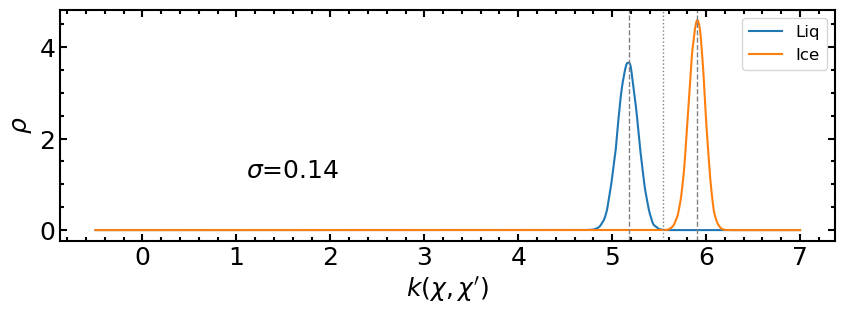

In [333]:
i = 0.14
s = f'histo-{i:.2f}'
data_liq=np.genfromtxt(f"../vii/dist/plumed_liq/{s}")
data_ice=np.genfromtxt(f"../vii/dist/plumed_ice/{s}")

x_liq = data_liq[:,0][np.argmax(data_liq[:,1])]
x_ice = data_ice[:,0][np.argmax(data_ice[:,1])]
intesect = (x_liq+x_ice)/2

fig, axs= plt.subplots(figsize=(10,3), nrows=1,sharex=True) #,sharey=True)
axs.plot(data_liq[:,0],data_liq[:,1], label='Liq')
axs.plot(data_ice[:,0],data_ice[:,1], label='Ice')
axs.text(1.1,np.amax(data_ice[:,1])/4,r"$\sigma$=" + f'{i:.2f}', fontsize=18)

axs.axvline(x_liq, ls='--', lw=1, color='gray')
axs.axvline(x_ice, ls='--', lw=1, color='gray')
axs.axvline(intesect, ls=':', lw=1, color='gray')

    
axs.legend(fontsize=12, loc='upper right')
axs.set_ylabel(r"$\rho$")
axs.set_xlabel(r"$k(\chi,\chi')$")

# axs.set_xlim(1,2.)